![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>


## Final Project 

In this notebook, we build a ML model to predict the __Time at Center__ field of our final project dataset.

1. <a href="#1">Read the dataset</a> (Given) 
2. <a href="#2">Train a model</a> (Implement)
    * <a href="#21">Exploratory Data Analysis</a>
    * <a href="#22">Select features to build the model</a>
    * <a href="#23">Data processing</a>
    * <a href="#24">Model training</a>
3. <a href="#3">Make predictions on the test dataset</a> (Implement)
4. <a href="#4">Write the test predictions to a CSV file</a> (Given)

__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a training.csv, test_features.csv and y_test.csv files. Similar to our review dataset, we didn't consider animals with multiple entries to the facility to keep it simple. If you want to see the original datasets, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Time at Center__ - Time at center (0 = less than 30 days; 1 = more than 30 days). This is the value to predict. 


In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn

    100% |████████████████████████████████| 1.5MB 4.9MB/s ta 0:00:011
  Found existing installation: pip 18.0
    Uninstalling pip-18.0:
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Library/Python/2.7/site-packages/pip-18.0-py2.7.egg/EGG-INFO/PKG-INFO'
Consider using the `--user` option or check the permissions.

    100% |████████████████████████████████| 8.3MB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 27.4MB 702kB/s eta 0:00:01
  Found existing installation: scipy 0.13.0b1
Cannot uninstall 'scipy'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


## 1. <a name="1">Read the datasets</a> (Given)
(<a href="#0">Go to top</a>)

Let's read the datasets into dataframes, using Pandas.

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
  
training_data = pd.read_csv('../data/final_project/training.csv')
test_data = pd.read_csv('../data/final_project/test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)


The shape of the training dataset is: (71538, 13)
The shape of the test dataset is: (23846, 12)


## 2. <a name="2">Train a model</a> (Implement)
(<a href="#0">Go to top</a>)

 * <a href="#21">Exploratory Data Analysis</a>
 * <a href="#22">Select features to build the model</a>
 * <a href="#23">Data processing</a>
 * <a href="#24">Model training</a>

### 2.1 <a name="21">Exploratory Data Analysis</a> 
(<a href="#2">Go to Train a model</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [3]:
# Implement here

training_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Time at Center
0,A745079,Transfer,Unknown,NaN,7920 Old Lockhart in Travis (TX),Stray,Normal,Cat,Unknown,Domestic Shorthair Mix,Blue,3,0
1,A801765,Transfer,Intact Female,NaN,5006 Table Top in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair,Brown Tabby/White,28,0
2,A667965,Transfer,Neutered Male,NaN,14100 Thermal Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Chihuahua Shorthair Mix,Brown/Tan,1825,0
3,A687551,Transfer,Intact Male,NaN,5811 Cedardale Dr in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,28,0
4,A773004,Adoption,Neutered Male,*Boris,Highway 290 And Arterial A in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,Tricolor/Cream,365,0


In [4]:
test_data.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days
0,A782657,Adoption,Spayed Female,NaN,1911 Dear Run Drive in Austin (TX),Stray,Normal,Dog,Intact Female,Labrador Retriever Mix,Black,60
1,A804622,Adoption,Neutered Male,NaN,702 Grand Canyon in Austin (TX),Stray,Normal,Dog,Intact Male,Boxer/Anatol Shepherd,Brown/Tricolor,60
2,A786693,Return to Owner,Neutered Male,Zeus,Austin (TX),Public Assist,Normal,Dog,Neutered Male,Australian Cattle Dog/Pit Bull,Black/White,3285
3,A693330,Adoption,Spayed Female,Hope,Levander Loop & Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,Miniature Poodle,Gray,1825
4,A812431,Adoption,Neutered Male,NaN,Austin (TX),Owner Surrender,Injured,Cat,Intact Male,Domestic Shorthair,Blue/White,210


In [27]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71538 entries, 0 to 71537
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pet ID                71538 non-null  object
 1   Outcome Type          71533 non-null  object
 2   Sex upon Outcome      71537 non-null  object
 3   Name                  44360 non-null  object
 4   Found Location        71538 non-null  object
 5   Intake Type           71538 non-null  object
 6   Intake Condition      71538 non-null  object
 7   Pet Type              71538 non-null  object
 8   Sex upon Intake       71537 non-null  object
 9   Breed                 71538 non-null  object
 10  Color                 71538 non-null  object
 11  Age upon Intake Days  71538 non-null  int64 
 12  Time at Center        71538 non-null  int64 
 13  hasName               71538 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 7.6+ MB


(array([4.6010e+04, 1.0101e+04, 3.7390e+03, 2.1400e+03, 3.4410e+03,
        1.2240e+03, 1.2230e+03, 6.9000e+02, 1.4670e+03, 5.4700e+02,
        3.0700e+02, 2.3300e+02, 3.0200e+02, 5.0000e+01, 3.1000e+01,
        1.8000e+01, 1.0000e+01, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0.  ,  456.25,  912.5 , 1368.75, 1825.  , 2281.25, 2737.5 ,
        3193.75, 3650.  , 4106.25, 4562.5 , 5018.75, 5475.  , 5931.25,
        6387.5 , 6843.75, 7300.  , 7756.25, 8212.5 , 8668.75, 9125.  ]),
 <a list of 20 Patch objects>)

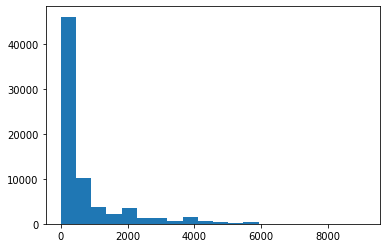

In [6]:
# hist of age upon intake days
import matplotlib.pyplot as plt
import numpy as np

plt.hist(training_data['Age upon Intake Days'], bins = 20)

In [37]:
training_data['Outcome Type'].fillna('Adoption', inplace=True)

In [38]:
training_data['Outcome Type'].value_counts()

Adoption           29801
Transfer           24258
Return to Owner    10288
Euthanasia          5689
Died                 806
Disposal             373
Rto-Adopt            275
Missing               37
Relocate              11
Name: Outcome Type, dtype: int64

In [36]:
training_data['Sex upon Outcome'].value_counts()

Neutered Male    22663
Spayed Female    21073
Intact Female    10311
Intact Male      10196
Unknown           7294
Name: Sex upon Outcome, dtype: int64

In [15]:
training_data['Sex upon Outcome'].value_counts() # need to impute values for unknowns
training_data['Sex upon Intake'].value_counts() # need to impute values for unknowns

Intact Male      24995
Intact Female    24402
Neutered Male     7864
Unknown           7294
Spayed Female     6982
Name: Sex upon Intake, dtype: int64

In [17]:
training_data['hasName'] = [1 if len(str(i))>=1 else 0 for i in training_data['Name']]

In [21]:
#convert categorical to numeric
training = pd.get_dummies(training_data, columns=['Outcome Type', 'Sex upon Outcome','Intake Type',
                                                  'Intake Condition','Pet Type','Sex upon Intake','Breed',
                                                 'Color'], drop_first=True)

### 2.2 <a name="22">Select features to build the model</a> 
(<a href="#2">Go to Train a model</a>)


In [39]:
replace_map = {
    'Outcome Type': {'Adoption':1,'Transfer':2,'Return to Owner':3,'Euthanasia': 4,'Died':5, 'Disposal':6,'Rto-Adopt':7,'Missing':8,'Relocate':9},
    'Sex upon Outcome': {'Neutered Male':1,'Spayed Female':2,'Intact Female':3,'Intact Male': 4,'Unknown':5}
}

### 2.3 <a name="23">Data Processing</a> 
(<a href="#2">Go to Train a model</a>)


In [14]:
# Implement here


### 2.4 <a name="24">Model training</a> 
(<a href="#2">Go to Train a model</a>)


In [15]:
# Implement here


## 3. <a name="3">Make predictions on the test dataset</a> (Implement)
(<a href="#0">Go to top</a>)

Use the test set to make predictions with the trained model.

In [16]:
# Implement here

# test_predictions = ...